# Exploratory Visual Analysis

## This script contains the following points:
### 1. Importing Libraries and Dataset
### 2. Deriving Variables
### 3. Explorating Relationships
        Correlation Heatmap
        Scatterplot
        Pair Plot
        Categorical Plot
### 4. Results
### 5. Exporting

## 1. Importing

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Import dataset
#path = r'/Users/poochies/Library/CloudStorage/OneDrive-Personal/05-2023 US Mass Shooting Data Analysis'
path = r'C:\Users\nguye\OneDrive\05-2023 US Mass Shooting Data Analysis'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Mass_Shootings_Clean.csv'), index_col = False)

## 2. Deriving Variables

In [4]:
# Create a new column to store total victims
total_vic = []

for value in df['Victims Injured']:
    total_vic = df['Victims Injured'] + df['Victims Killed']

In [5]:
total_vic

0       4
1       4
2       4
3       6
4       4
       ..
4227    5
4228    4
4229    4
4230    4
4231    4
Length: 4232, dtype: int64

In [6]:
# Add list to dataframe
df.insert(7, 'Total Victims', total_vic)
df.head()

,Unnamed: 0,Incident ID,Incident Date,State,City Or County,Victims Injured,Victims Killed,Total Victims,Suspects Injured,Suspects Killed,Suspects Arrested
0,0,2589765,"May 6, 2023",Ohio,Columbus,3,1,4,1,0,0
1,1,2589804,"May 5, 2023",Mississippi,Natchez,2,2,4,0,0,0
2,2,2589790,"May 5, 2023",Mississippi,Vicksburg,4,0,4,0,0,0
3,3,2589699,"May 5, 2023",Mississippi,Ocean Springs,5,1,6,0,0,0
4,4,2587918,"May 3, 2023",Illinois,Chicago,4,0,4,0,0,0


In [7]:
# Create a new column for total suspects
total_sus = []

for value in df['Suspects Injured']:
    total_sus = df['Suspects Injured'] + df['Suspects Killed'] + df['Suspects Arrested']

In [8]:
total_sus

0       1
1       0
2       0
3       0
4       0
       ..
4227    0
4228    0
4229    0
4230    0
4231    0
Length: 4232, dtype: int64

In [9]:
# Add list to dataframe
df['Total Suspects'] = total_sus

In [10]:
df.head()

,Unnamed: 0,Incident ID,Incident Date,State,City Or County,Victims Injured,Victims Killed,Total Victims,Suspects Injured,Suspects Killed,Suspects Arrested,Total Suspects
0,0,2589765,"May 6, 2023",Ohio,Columbus,3,1,4,1,0,0,1
1,1,2589804,"May 5, 2023",Mississippi,Natchez,2,2,4,0,0,0,0
2,2,2589790,"May 5, 2023",Mississippi,Vicksburg,4,0,4,0,0,0,0
3,3,2589699,"May 5, 2023",Mississippi,Ocean Springs,5,1,6,0,0,0,0
4,4,2587918,"May 3, 2023",Illinois,Chicago,4,0,4,0,0,0,0


## 3. Exploring Relationships
### Correlation Heatmap

In [11]:
df.columns

Index(['Unnamed: 0', 'Incident ID', 'Incident Date', 'State', 'City Or County',
       'Victims Injured', 'Victims Killed', 'Total Victims',
       'Suspects Injured', 'Suspects Killed', 'Suspects Arrested',
       'Total Suspects'],
      dtype='object')

In [12]:
# Create a subset excluding "Unnamed: 0", "Incidnet ID", "Incident Date"
sub = df[['Victims Injured', 'Victims Killed', 'Total Victims', 'Suspects Injured', 'Suspects Killed', 'Suspects Arrested', 'Total Suspects']]

In [13]:
sub

,Victims Injured,Victims Killed,Total Victims,Suspects Injured,Suspects Killed,Suspects Arrested,Total Suspects
0,3,1,4,1,0,0,1
1,2,2,4,0,0,0,0
2,4,0,4,0,0,0,0
3,5,1,6,0,0,0,0
4,4,0,4,0,0,0,0
...,...,...,...,...,...,...,...
4227,5,0,5,0,0,0,0
4228,4,0,4,0,0,0,0
4229,3,1,4,0,0,0,0
4230,3,1,4,0,0,0,0


Text(0.5, 1.0, 'Mass Shootings Correlation Heatmap')

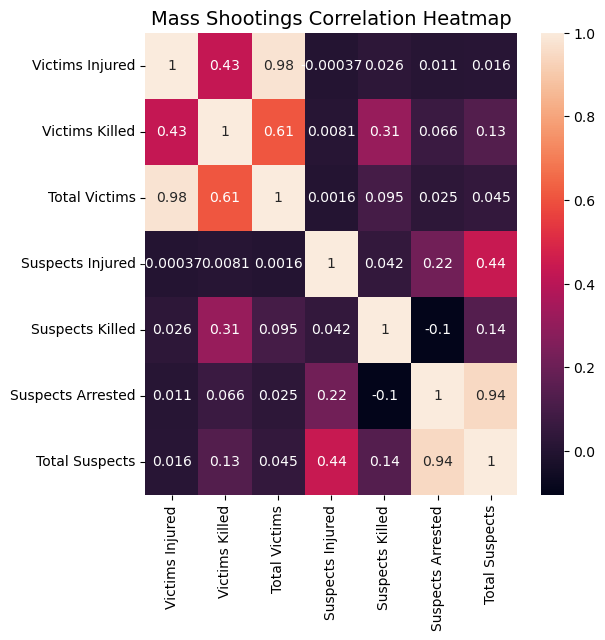

In [14]:
# Create a subplot
f, ax = plt.subplots(figsize = (6, 6))

#Create correlation heatmap utilizing seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)
plt.title('Mass Shootings Correlation Heatmap', fontsize = 14)

This heatmap shows a weak relationship between suspects and victim variables, but a moderate to strong relationship with suspect to suspect and victim to victim respectively. This is expected as the variables are expected to have some relationship with each other, but because these variables are only counts of victims or suspects, the heatmap provides no meaningful value to the analysis. 

### Scatterplot

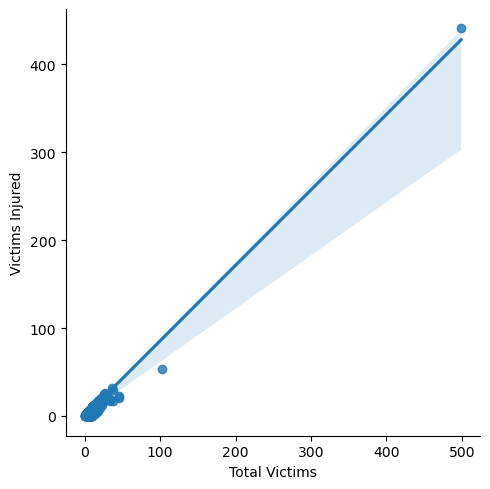

In [15]:
# Create a scatterplot for victims variables
sns.lmplot(x = 'Total Victims', y = 'Victims Injured', data = df)

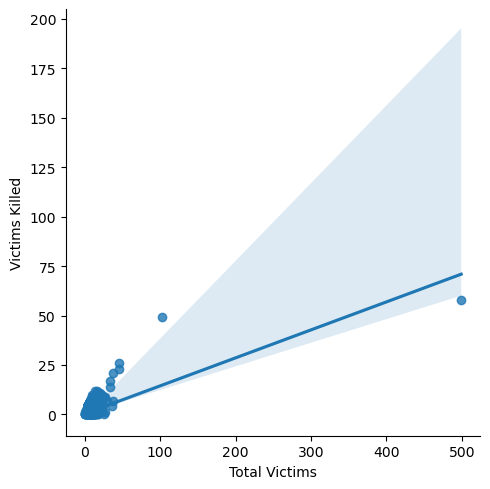

In [16]:
sns.lmplot(x = 'Total Victims', y = 'Victims Killed', data = df)

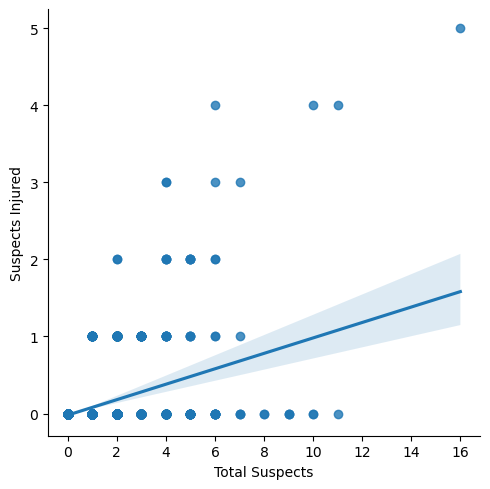

In [17]:
# Create a scatter plot for suspects variables
sns.lmplot(x = 'Total Suspects', y = 'Suspects Injured', data = df)

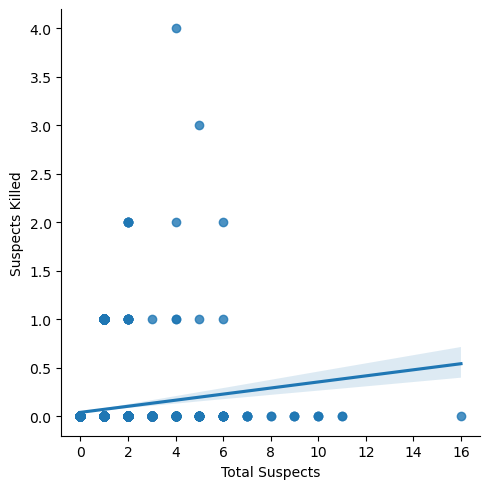

In [18]:
sns.lmplot(x = 'Total Suspects', y = 'Suspects Killed', data = df)

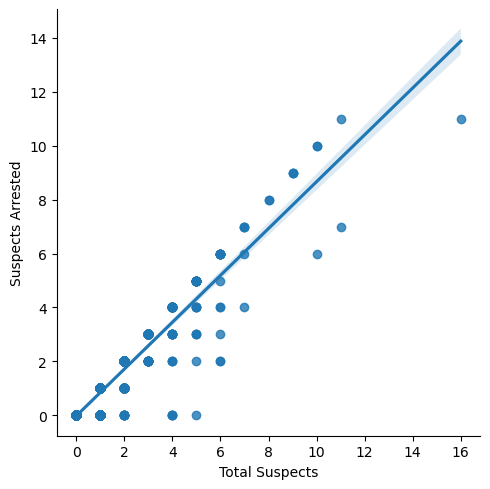

In [19]:
sns.lmplot(x = 'Total Suspects', y = 'Suspects Arrested', data = df)

Although the scatterplot shows a linear trend, this does not depict a meaningful relationship between the variables. The relationship that is displayed in the scatterplot is expected as it's based on the total count that was derived earlier. In fact, the scatterplot does show a possible outlier in the victims' scatterplot which will further be explored. 

### Pair Plots

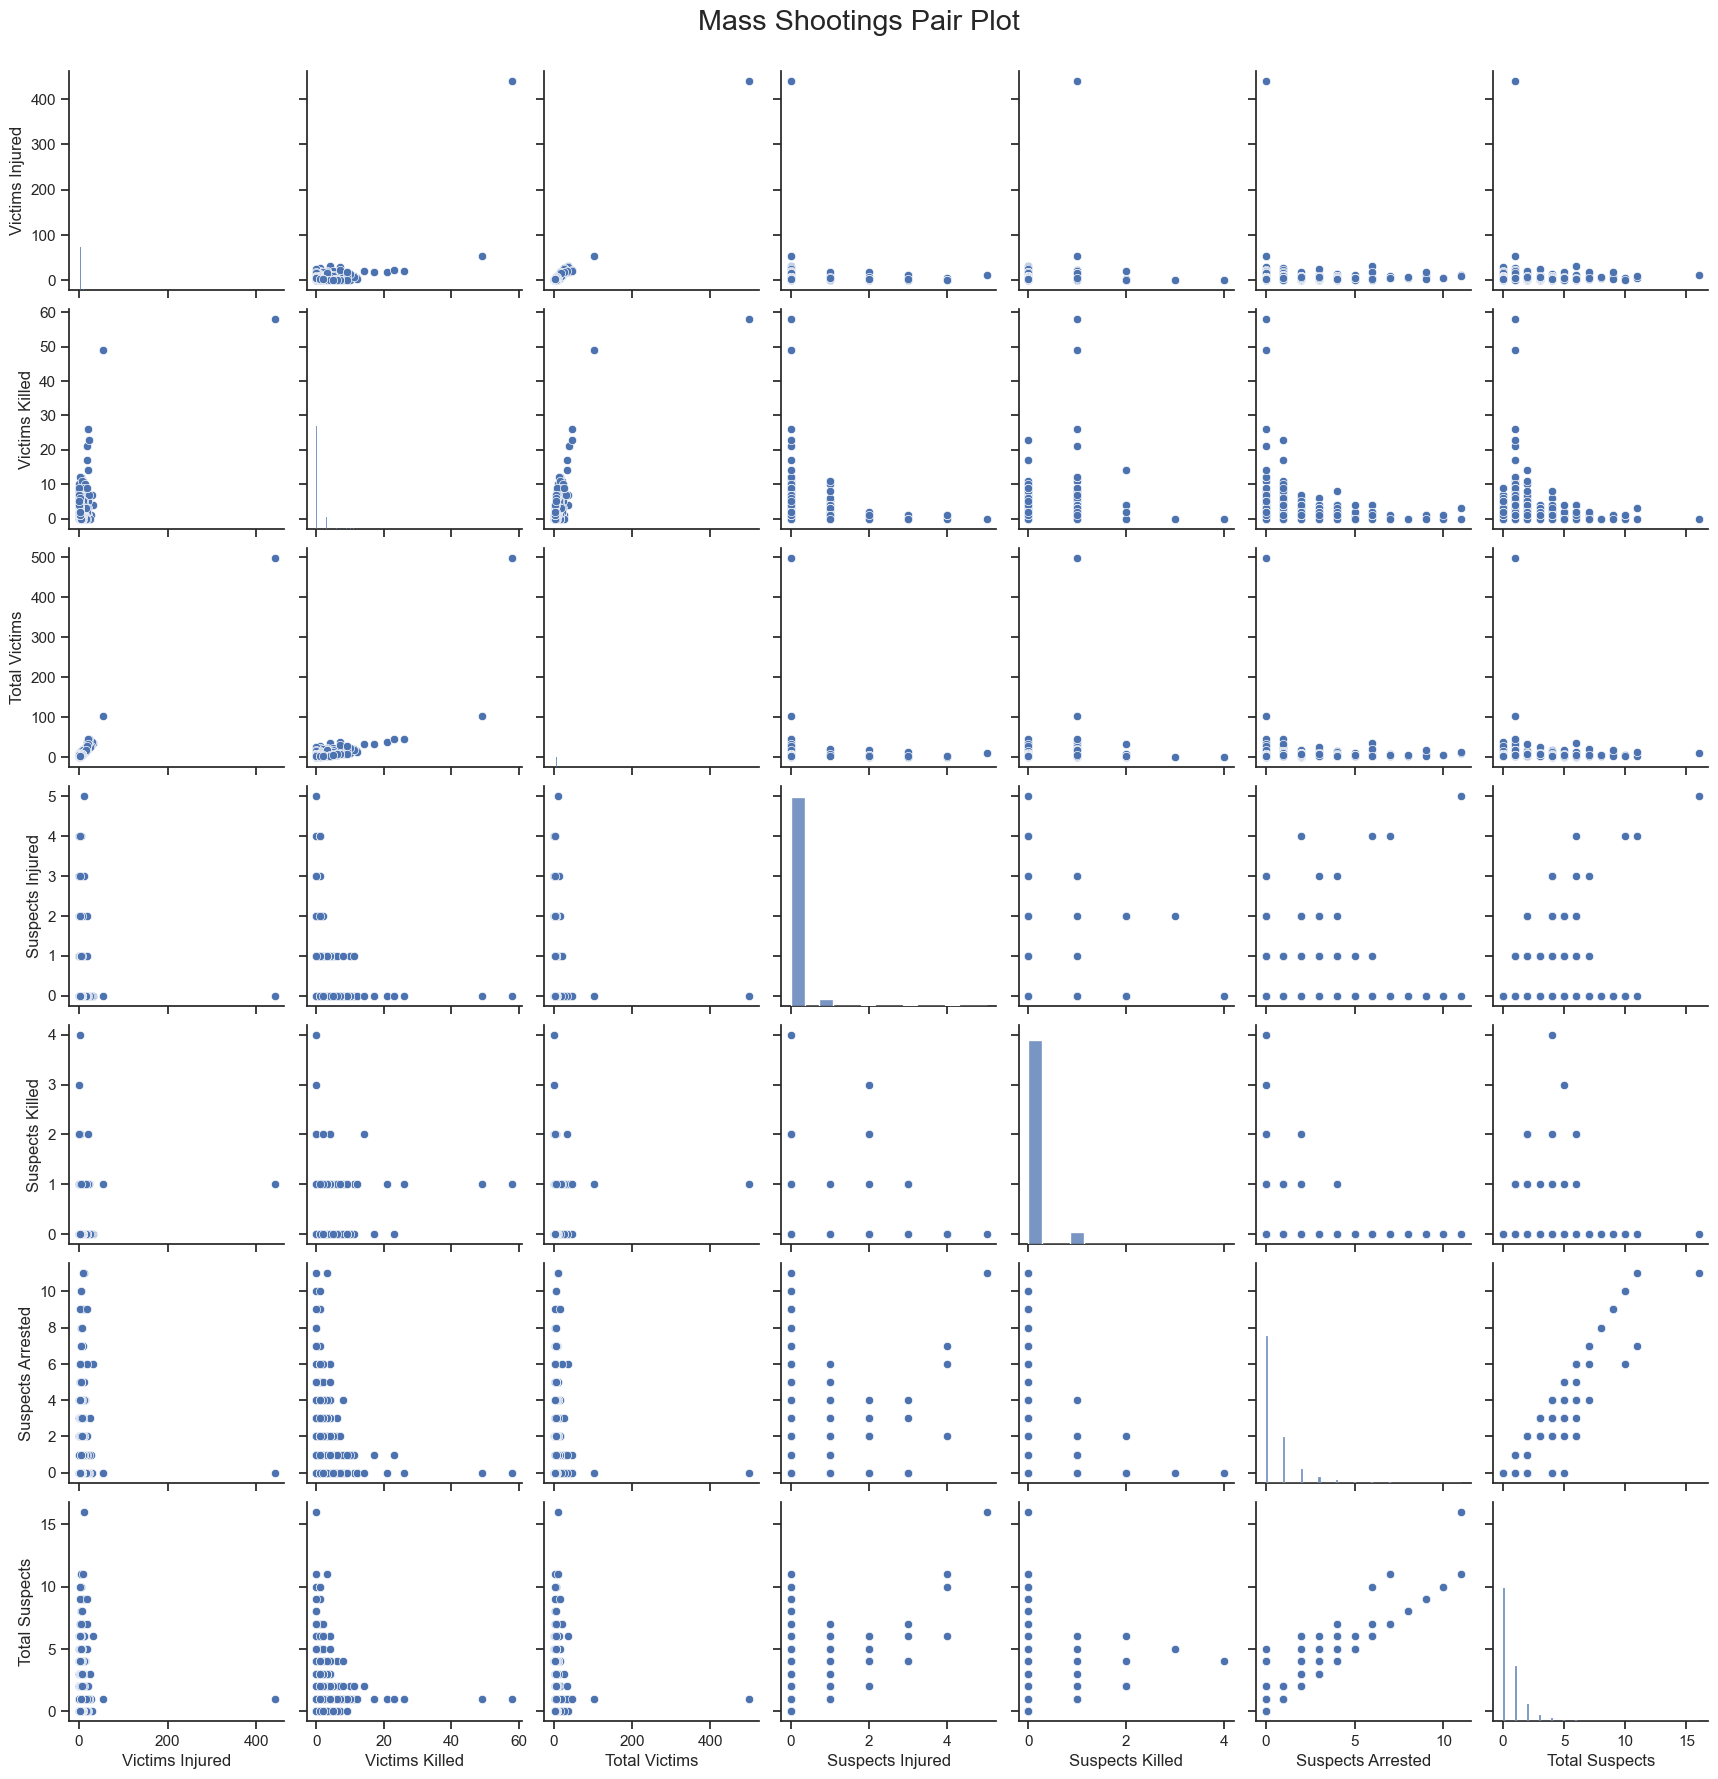

In [38]:
# Create a pair plot
pplot = sns.pairplot(sub)
pplot.fig.suptitle('Mass Shootings Pair Plot', y = 1.02, fontsize = 'xx-large')

# Export pair plot
pplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Pair_Plot.png'))

The results of the pair plot does not show any meaningful results to further explore. For the purpose of the categorical plots, the "Total Suspects" variable will be utilized. 

### Categorical Plots

<AxesSubplot:xlabel='Total Suspects', ylabel='Count'>

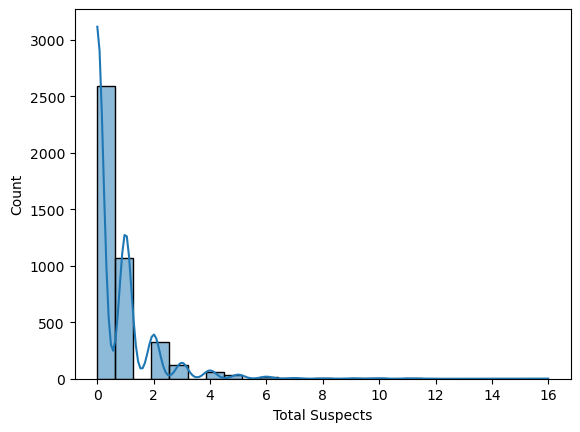

In [21]:
# Create a histogram of suspects arrested
sns.histplot(df['Total Suspects'], bins = 25, kde = True)

In [22]:
# Create a categorical variable splitting the suspects arrested column into categories
df.loc[df['Total Suspects'] == 0, 'Suspect Category'] = 'No suspects'
df.loc[df['Total Suspects'] == 1, 'Suspect Category'] = 'Single suspect'
df.loc[df['Total Suspects'] > 1, 'Suspect Category'] = 'Multiple suspects'

In [23]:
df['Suspect Category'].value_counts(dropna = False)

No suspects          2593
Single suspect       1073
Multiple suspects     566
Name: Suspect Category, dtype: int64

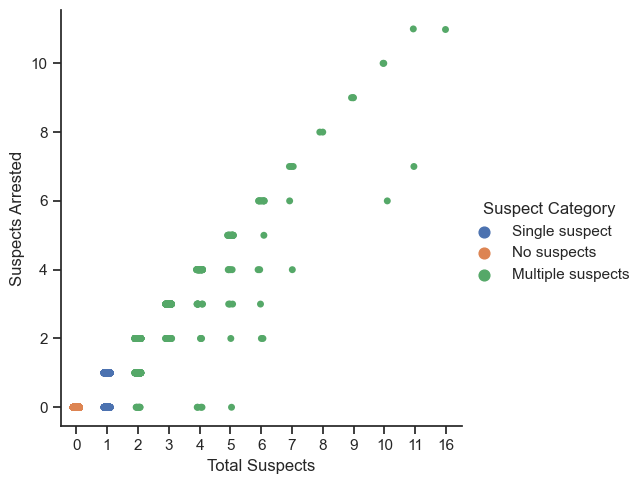

In [24]:
# Create categorical plot using suspect categories
sns.set(style = 'ticks')
cplot = sns.catplot(x = 'Total Suspects', y = 'Suspects Arrested', hue = 'Suspect Category', data = df)

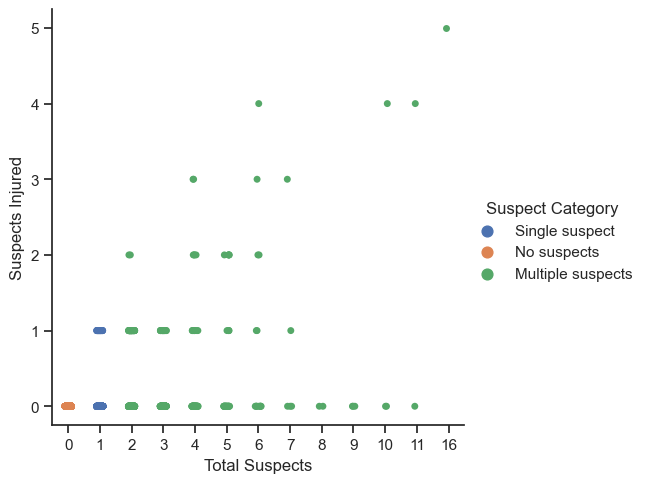

In [25]:
sns.set(style = 'ticks')
cplot_2 = sns.catplot(x = 'Total Suspects', y = 'Suspects Injured', hue = 'Suspect Category', data = df)

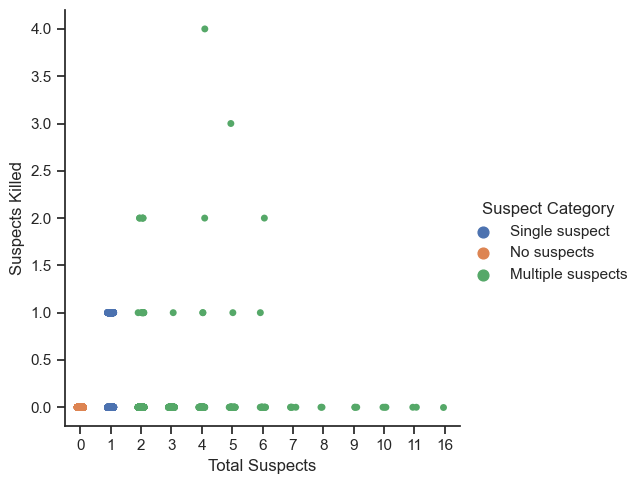

In [26]:
sns.set(style = 'ticks')
cplot_3 = sns.catplot(x = 'Total Suspects', y = 'Suspects Killed', hue = 'Suspect Category', data = df)

For the categorical plot, I categorized the "Total Suspects" into 3 different categories. From there, I compared it to the suspects variables. Again, because the nature of my analysis, the categorical plot did not provide any meaningful results to the analysis. 

## 4. Results

The purpose of this script was to create the charts in accordance with the task. Unfortunately the dataset that I am working on does not show any meaningful exploratory visual analysis. My focus is more on the temporal and spatial analysis. I want to look more into the distribution of mass shooting incidents within the United States. With the variables provided, no meaningful correlation can be contributed to the analysis. Therefore, this portion of the analysis provided no answers to my questions or an hypothesis to the analysis. 

## 5. Exporting

In [27]:
# Exporting dataframe
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Mass_Shootings_EVA.csv'))